<a href="https://colab.research.google.com/github/Samdatascienti/Samdatascienti/blob/main/Lorraine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# as usual, let us load all the necessary libraries
import numpy as np  # numerical computation with arrays
import pandas as pd # library to manipulate datasets using dataframes
import scipy as sp  # statistical library
from google.colab import files

# below sklearn libraries for different models
from sklearn.tree import DecisionTreeClassifier as DecisionTree
from sklearn.ensemble import RandomForestClassifier as RandomForest
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.impute import KNNImputer
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# path='/content/gdrive/MyDrive/data/Data V0.xlsx'
# df = pd.read_excel(path)
# df.head()
# path='/content/gdrive/MyDrive/data/Data_lorr.csv'
# df=pd.read_csv(path)
# df.head()
# path='/content/gdrive/MyDrive/data/RPHIA2018FINBIO_20190712.dta'
path='/content/gdrive/MyDrive/data/data_lorraine.dta'
ddf=pd.read_stata(path)
ddf.head()


,country,householdid,personid,centroidid,province,gender,age,schlhi,schcom,schomdk,work12mo,curmar,mcstatus,mcplans,mcage,firstsxage,firstsxagedk,part12monum,part12modkr,partlivew1,partrelation1,partgend1,partage1,partlastcndm1,partlastsup1,partlastsupwhat_a1,partlastsupwhat_b1,partlastsupwhat_f1,partlastsupwhat_x1,partagain1,partknowhiv1,parthivtest1,parthivsat1,partrelation2,partgend2,partage2,partagedk2,partlastcndm2,partlastsup2,partagain2,partknowhiv2,parthivtest2,parthivsat2,partrelation3,partgend3,partage3,partagedk3,partlastcndm3,partlastsup3,partknowhiv3,parthivtest3,parthivsat3,analsxever,firstsexphysf,firstsexphysfdk,hivtstever,hivtesty,hivtstrslt,hivtfposy,hivstathide,arvstakenev,attitude1,attitude2,urban,known_hiv_status,wealthquintile,wealthscorecont,hivstatusfinal,educationrwanda,hhrmarital,evertested,sex12months,sexever,lastpartner,condomlastsex12months,lastpartnerrelation12months,allpartnersspouselivein12months,condomlastnonmaritalsex12months
0,Rwanda,RW000000000001,RW00000000000101,RW000069,City of Kigali,Female,42,3.0,1.0,NaN,1.0,1.0,NaN,NaN,NaN,28.0,NaN,1.0,NaN,1.0,1.0,1.0,44.0,2.0,2.0,,,,,1.0,1.0,2.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,-8.0,1.0,2018.0,2.0,NaN,NaN,NaN,3.0,3.0,1,2.0,5.0,3.3552,2,3,1,1,1,1,1.0,2,1,1,99
1,Rwanda,RW000000000001,RW00000000000102,RW000069,City of Kigali,Male,44,4.0,2.0,NaN,1.0,1.0,1.0,NaN,10.0,17.0,NaN,1.0,NaN,1.0,1.0,2.0,42.0,2.0,2.0,,,,,1.0,1.0,2.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,-8.0,1.0,2016.0,2.0,NaN,NaN,NaN,3.0,3.0,1,2.0,5.0,3.3552,2,4,1,1,1,1,1.0,2,1,1,99
2,Rwanda,RW000000000001,RW00000000000107,RW000069,City of Kigali,Female,30,3.0,3.0,NaN,1.0,5.0,NaN,NaN,NaN,20.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,,,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2013.0,2.0,NaN,NaN,NaN,3.0,1.0,1,2.0,5.0,3.3552,2,3,3,1,2,1,NaN,3,99,99,99
3,Rwanda,RW000000000001,RW00000000000108,RW000069,City of Kigali,Female,24,3.0,3.0,NaN,1.0,NaN,NaN,NaN,NaN,24.0,NaN,1.0,NaN,2.0,8.0,1.0,27.0,2.0,2.0,,,,,1.0,2.0,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,27.0,NaN,1.0,2018.0,2.0,NaN,NaN,NaN,4.0,3.0,1,2.0,5.0,3.3552,2,3,5,1,1,1,1.0,2,8,2,2
4,Rwanda,RW000000000002,RW00000000000201,RW000259,City of Kigali,Male,42,2.0,6.0,NaN,1.0,NaN,1.0,NaN,35.0,22.0,NaN,1.0,NaN,2.0,8.0,2.0,35.0,2.0,2.0,,,,,2.0,2.0,2.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,22.0,NaN,1.0,2018.0,2.0,NaN,NaN,NaN,4.0,4.0,1,2.0,5.0,0.7455,2,2,5,1,1,1,1.0,2,8,2,2


In [ ]:
df=ddf
df["province"]=df["province"].map({"City of Kigali": "kigali", "North":"north","South":"south","West":"west","East":"east"})
df['schlhi'] = df['schlhi'].map({1.0: "NURSERY", 2.0: "PRIMARY", 3.0:"SECONDARY", 4.0:"HIGHER", -8.0:"DON'T KNOW", 
                     -9.0:"REFUSED" }) 
df["work12mo"]=df["work12mo"].map({1.0: "YES", 2.0: "NO", -8.0:"DON'T KNOW", -9.0:"REFUSED" })
df["curmar"]=df["curmar"].map({1.0: "MARRIED", 2.0: "LIVING TOGETHER", 3.0:"WIDOWED", 4.0:"DIVORCED",5.0:"SEPARATED",
                      -8.0:"DON'T KNOW", -9.0:"REFUSED" })
df["mcstatus"]=df["mcstatus"].map({1.0: "YES", 2.0: "NO", -8.0:"DON'T KNOW", -9.0:"REFUSED" })
df["firstsxagedk"]=df["firstsxagedk"].map({96.0: "NEVER HAD VAGINAL SEX", -7.0: "OUT OF RANGE", -8.0:"DON'T KNOW", -9.0:"REFUSED" })
df["part12modkr"]=df["part12modkr"].map({-8.0:"DON'T KNOW", -9.0:"REFUSED" })
df["partlivew1"]=df["partlivew1"].map({1: "YES", 2: "NO" })
df["partrelation1"]=df["partrelation1"].map({1.0: "HUSBAND/WIFE", 2.0: "LIVE-IN PARTNER", 3.0:"PARTNER NOT LIVING WITH RESPONDENT", 
                             4.0:"EX-SPOUSE/EX-PARTNER",5.0:"FRIEND/ACQUAINTANCE",6.0:"SEX WORKER",
                             7.0:"SEX WORKER CLIENT", 8.0:"STRANGER",9.0:"OTHER (SPECIFY)",
                             -8.0:"DON'T KNOW", -9.0:"REFUSED" })
df["partgend1"]=df["partgend1"].map({1.0: "MALE", 2.0: "FEMALE", -8.0:"DON'T KNOW", -9.0:"REFUSED" })
df["partlastcndm1"]=df["partlastcndm1"].map({1.0: "YES", 2.0: "NO", -8.0:"DON'T KNOW", -9.0:"REFUSED" })
df["partlastsup1"]=df["partlastsup1"].map({1.0: "YES", 2.0: "NO", -8.0:"DON'T KNOW", -9.0:"REFUSED" })
df["partagain1"]=df["partagain1"].map({1.0: "YES", 2.0: "NO", -8.0:"DON'T KNOW", -9.0:"REFUSED" })
df["partknowhiv1"]=df["partknowhiv1"].map({1.0: "YES", 2.0: "NO", -8.0:"DON'T KNOW", -9.0:"REFUSED" })
df["parthivtest1"]=df["parthivtest1"].map({1.0: "YES", 2.0: "NO", -8.0:"DON'T KNOW", -9.0:"REFUSED" })
df["parthivsat1"]=df["parthivsat1"].map({1.0: "I think he/she is positive", 2.0:"he/she told me he/she is positive", 
                           3.0:"he/she is positive, tested together", 
                           4.0: "I think he/she is negative", 5.0: "He/she told me he/she is negative",
                           6.0:"He/she is negative, tested together",
                           7:"Don't know status", -9:"Refused"})
df["partrelation2"]=df["partrelation2"].map({1.0: "HUSBAND/WIFE", 2.0: "LIVE-IN PARTNER", 3.0:"PARTNER NOT LIVING WITH RESPONDENT", 
                             4.0:"EX-SPOUSE/EX-PARTNER",5.0:"FRIEND/ACQUAINTANCE",6.0:"SEX WORKER",
                             7.0:"SEX WORKER CLIENT", 8.0:"STRANGER",9.0:"OTHER (SPECIFY)",
                             -8.0:"DON'T KNOW", -9.0:"REFUSED" })
df["partgend2"]=df["partgend2"].map({1.0: "MALE", 2.0: "FEMALE", -8.0:"DON'T KNOW", -9.0:"REFUSED" })
df["partlastcndm2"]=df["partlastcndm2"].map({1.0: "YES", 2.0: "NO", -8.0:"DON'T KNOW", -9.0:"REFUSED" })
df["partlastsup2"]=df["partlastsup2"].map({1.0: "YES", 2.0: "NO", -8.0:"DON'T KNOW", -9.0:"REFUSED" })
df["partagain2"]=df["partagain2"].map({1.0: "YES", 2.0: "NO", -8.0:"DON'T KNOW", -9.0:"REFUSED" })
df["partknowhiv2"]=df["partknowhiv2"].map({1.0: "YES", 2.0: "NO", -8.0:"DON'T KNOW", -9.0:"REFUSED" })
df["parthivtest2"]=df["parthivtest2"].map({1.0: "YES", 2.0: "NO", -8.0:"DON'T KNOW", -9.0:"REFUSED" })
df["parthivsat2"]=df["parthivsat2"].map({1.0: "I think he/she is positive", 2.0:"he/she told me he/she is positive", 
                           3.0:"he/she is positive, tested together", 
                           4.0: "I think he/she is negative", 5: "He/she told me he/she is negative",
                           6.0:"He/she is negative, tested together",
                           7.0:"Don't know status", -9.0:"Refused"})
df["partrelation3"]=df["partrelation3"].map({1.0: "HUSBAND/WIFE", 2.0: "LIVE-IN PARTNER", 3.0:"PARTNER NOT LIVING WITH RESPONDENT", 
                             4.0:"EX-SPOUSE/EX-PARTNER",5.0:"FRIEND/ACQUAINTANCE",6.0:"SEX WORKER",
                             7.0:"SEX WORKER CLIENT", 8.0:"STRANGER",9.0:"OTHER (SPECIFY)",
                             -8.0:"DON'T KNOW", -9.0:"REFUSED" })
df["partgend3"]=df["partgend3"].map({1.0: "MALE", 2.0: "FEMALE", -8.0:"DON'T KNOW", -9.0:"REFUSED" })
df["partlastcndm3"]=df["partlastcndm3"].map({1.0: "YES", 2.0: "NO", -8.0:"DON'T KNOW", -9.0:"REFUSED" })
df["partlastsup3"]=df["partlastsup3"].map({1.0: "YES", 2.0: "NO", -8.0:"DON'T KNOW", -9.0:"REFUSED" })

df["partknowhiv3"]=df["partknowhiv3"].map({1.0: "YES", 2.0: "NO", -8.0:"DON'T KNOW", -9.0:"REFUSED" })
df["parthivtest3"]=df["parthivtest3"].map({1.0: "YES", 2.0: "NO", -8.0:"DON'T KNOW", -9.0:"REFUSED" })
df["parthivsat3"]=df["parthivsat3"].map({1.0: "I think he/she is positive", 2.0:"he/she told me he/she is positive", 
                           3.0:"he/she is positive, tested together", 
                           4.0: "I think he/she is negative", 5.0: "He/she told me he/she is negative",
                           6.0:"He/she is negative, tested together",
                           7.0:"Don't know status", -9.0:"Refused"})
df["analsxever"]=df["analsxever"].map({1.0: "YES", 2.0: "NO", -8.0:"DON'T KNOW", -9.0:"REFUSED" })
df["hivtstrslt"]=df["hivtstrslt"].map({1.0: "POSITIVE", 2.0: "NEGATIVE", 3.0:"UNCERTAIN/INDETERMINATE",
                          4.0:"DID NOT RECEIVE THE RESULT",-8.0:"DON'T KNOW", -9.0:"REFUSED" })
df["attitude1"]=df["attitude1"].map({1.0: "STRONGLY AGREE", 2.0: "AGREE", 3.0:"DISAGREE",
                          4.0:"STRONGLY DISAGREE",-8.0:"DON'T KNOW", -9.0:"REFUSED" })
df["attitude2"]=df["attitude2"].map({1.0: "STRONGLY AGREE", 2.0: "AGREE", 3.0:"DISAGREE",
                          4.0:"STRONGLY DISAGREE",-8.0:"DON'T KNOW", -9.0:"REFUSED" })
df["urban"]=df["urban"].map({1: "Urban", 2: "Rural" })
df["known_hiv_status"]=df["known_hiv_status"].map({1.0: "STATED HIV POSITIVE", 2.0: "STATED HIV NEGATIVE",99.0:"NEVER TESTED",
                                -8.0:"Don’tKnow/Refused/Unknown/Intdeterminate/ResultsNot Received"})
df["wealthquintile"]=df["wealthquintile"].map({1.0: "Lowest", 2.0: "Second",3.0:"Middle",
                                4.0:"Fourth", 5.0:"Highest",99.0:"Missing"})
df["hivstatusfinal"]=df["hivstatusfinal"].map({1: "HIV Positive", 2: "HIV Negative", 99:"Missing"})
df["educationrwanda"]=df["educationrwanda"].map({1: "No education", 2: "Primary", 3:"Secondary", 4:"More than Secondary", 99:"Missing"})
df["hhrmarital"]=df["hhrmarital"].map({1: "MARRIED/COHABITING/LIVINGTOGETHER", 2: "DIVORCED", 3:"SEPARATED", 4:"WIDOWED",5:"NEVER-MARRIED", 99:"Missing"})
df["sex12months"]=df["sex12months"].map({1: "Yes", 2: "No", 99:"Missing"})
df["sexever"]=df["sexever"].map({1: "Yes", 2: "No", 99:"Missing"})
df["lastpartner"]=df["lastpartner"].map({1.0: "partner 1", 2.0: "partner 2", 3.0:"partner 3"})
df["condomlastsex12months"]=df["condomlastsex12months"].map({1: "used condom", 2: "no condom ", 3:"no sex",99:"Missing"})
df["lastpartnerrelation12months"]=df["lastpartnerrelation12months"].map({1: "husband or wife", 2: "live-in partner", 3:"not live-in partner", 4:"ex-spouse or ex-partner",
                                           5:"riend/acquaintance",6:"sex worker",7:"sexworker client",
                                           8:"stranger",9:"other relationship",99:"Missing"})
df.head()

,country,householdid,personid,centroidid,province,gender,age,schlhi,schcom,schomdk,work12mo,curmar,mcstatus,mcplans,mcage,firstsxage,firstsxagedk,part12monum,part12modkr,partlivew1,partrelation1,partgend1,partage1,partlastcndm1,partlastsup1,partlastsupwhat_a1,partlastsupwhat_b1,partlastsupwhat_f1,partlastsupwhat_x1,partagain1,partknowhiv1,parthivtest1,parthivsat1,partrelation2,partgend2,partage2,partagedk2,partlastcndm2,partlastsup2,partagain2,partknowhiv2,parthivtest2,parthivsat2,partrelation3,partgend3,partage3,partagedk3,partlastcndm3,partlastsup3,partknowhiv3,parthivtest3,parthivsat3,analsxever,firstsexphysf,firstsexphysfdk,hivtstever,hivtesty,hivtstrslt,hivtfposy,hivstathide,arvstakenev,attitude1,attitude2,urban,known_hiv_status,wealthquintile,wealthscorecont,hivstatusfinal,educationrwanda,hhrmarital,evertested,sex12months,sexever,lastpartner,condomlastsex12months,lastpartnerrelation12months,allpartnersspouselivein12months,condomlastnonmaritalsex12months
0,Rwanda,RW000000000001,RW00000000000101,RW000069,kigali,Female,42,SECONDARY,1.0,NaN,YES,MARRIED,NaN,NaN,NaN,28.0,NaN,1.0,NaN,YES,HUSBAND/WIFE,MALE,44.0,NO,NO,,,,,YES,YES,NO,He/she told me he/she is negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,NaN,-8.0,1.0,2018.0,NEGATIVE,NaN,NaN,NaN,DISAGREE,DISAGREE,Urban,STATED HIV NEGATIVE,Highest,3.3552,HIV Negative,Secondary,MARRIED/COHABITING/LIVINGTOGETHER,1,Yes,Yes,partner 1,no condom,husband or wife,1,99
1,Rwanda,RW000000000001,RW00000000000102,RW000069,kigali,Male,44,HIGHER,2.0,NaN,YES,MARRIED,YES,NaN,10.0,17.0,NaN,1.0,NaN,YES,HUSBAND/WIFE,FEMALE,42.0,NO,NO,,,,,YES,YES,NO,He/she told me he/she is negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,NaN,-8.0,1.0,2016.0,NEGATIVE,NaN,NaN,NaN,DISAGREE,DISAGREE,Urban,STATED HIV NEGATIVE,Highest,3.3552,HIV Negative,More than Secondary,MARRIED/COHABITING/LIVINGTOGETHER,1,Yes,Yes,partner 1,no condom,husband or wife,1,99
2,Rwanda,RW000000000001,RW00000000000107,RW000069,kigali,Female,30,SECONDARY,3.0,NaN,YES,SEPARATED,NaN,NaN,NaN,20.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,,,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2013.0,NEGATIVE,NaN,NaN,NaN,DISAGREE,STRONGLY AGREE,Urban,STATED HIV NEGATIVE,Highest,3.3552,HIV Negative,Secondary,SEPARATED,1,No,Yes,NaN,no sex,Missing,99,99
3,Rwanda,RW000000000001,RW00000000000108,RW000069,kigali,Female,24,SECONDARY,3.0,NaN,YES,NaN,NaN,NaN,NaN,24.0,NaN,1.0,NaN,NO,STRANGER,MALE,27.0,NO,NO,,,,,YES,NO,YES,I think he/she is negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,27.0,NaN,1.0,2018.0,NEGATIVE,NaN,NaN,NaN,STRONGLY DISAGREE,DISAGREE,Urban,STATED HIV NEGATIVE,Highest,3.3552,HIV Negative,Secondary,NEVER-MARRIED,1,Yes,Yes,partner 1,no condom,stranger,2,2
4,Rwanda,RW000000000002,RW00000000000201,RW000259,kigali,Male,42,PRIMARY,6.0,NaN,YES,NaN,YES,NaN,35.0,22.0,NaN,1.0,NaN,NO,STRANGER,FEMALE,35.0,NO,NO,,,,,NO,NO,NO,He/she told me he/she is negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,22.0,NaN,1.0,2018.0,NEGATIVE,NaN,NaN,NaN,STRONGLY DISAGREE,STRONGLY DISAGREE,Urban,STATED HIV NEGATIVE,Highest,0.7455,HIV Negative,Primary,NEVER-MARRIED,1,Yes,Yes,partner 1,no condom,stranger,2,2


In [ ]:
df=df.drop(['schcom','schomdk','mcplans','partlastsupwhat_a1','partlastsupwhat_b1',
            'partlastsupwhat_f1','partlastsupwhat_x1','firstsexphysf','firstsexphysfdk','hivtstever',
            'hivstathide','arvstakenev','wealthscorecont','evertested','allpartnersspouselivein12months',
            'condomlastnonmaritalsex12months','known_hiv_status',
             'mcage', 'partlivew1', 'partagain1', 'parthivtest1', 'parthivsat1', 'sex12months', 'sexever',
            'condomlastsex12months', 'lastpartnerrelation12months'], axis=1)
df.head()

,country,householdid,personid,centroidid,province,gender,age,schlhi,work12mo,curmar,mcstatus,firstsxage,firstsxagedk,part12monum,part12modkr,partrelation1,partgend1,partage1,partlastcndm1,partlastsup1,partknowhiv1,partrelation2,partgend2,partage2,partagedk2,partlastcndm2,partlastsup2,partagain2,partknowhiv2,parthivtest2,parthivsat2,partrelation3,partgend3,partage3,partagedk3,partlastcndm3,partlastsup3,partknowhiv3,parthivtest3,parthivsat3,analsxever,hivtesty,hivtstrslt,hivtfposy,attitude1,attitude2,urban,wealthquintile,hivstatusfinal,educationrwanda,hhrmarital,lastpartner
0,Rwanda,RW000000000001,RW00000000000101,RW000069,kigali,Female,42,SECONDARY,YES,MARRIED,NaN,28.0,NaN,1.0,NaN,HUSBAND/WIFE,MALE,44.0,NO,NO,YES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,2018.0,NEGATIVE,NaN,DISAGREE,DISAGREE,Urban,Highest,HIV Negative,Secondary,MARRIED/COHABITING/LIVINGTOGETHER,partner 1
1,Rwanda,RW000000000001,RW00000000000102,RW000069,kigali,Male,44,HIGHER,YES,MARRIED,YES,17.0,NaN,1.0,NaN,HUSBAND/WIFE,FEMALE,42.0,NO,NO,YES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,2016.0,NEGATIVE,NaN,DISAGREE,DISAGREE,Urban,Highest,HIV Negative,More than Secondary,MARRIED/COHABITING/LIVINGTOGETHER,partner 1
2,Rwanda,RW000000000001,RW00000000000107,RW000069,kigali,Female,30,SECONDARY,YES,SEPARATED,NaN,20.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.0,NEGATIVE,NaN,DISAGREE,STRONGLY AGREE,Urban,Highest,HIV Negative,Secondary,SEPARATED,NaN
3,Rwanda,RW000000000001,RW00000000000108,RW000069,kigali,Female,24,SECONDARY,YES,NaN,NaN,24.0,NaN,1.0,NaN,STRANGER,MALE,27.0,NO,NO,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,2018.0,NEGATIVE,NaN,STRONGLY DISAGREE,DISAGREE,Urban,Highest,HIV Negative,Secondary,NEVER-MARRIED,partner 1
4,Rwanda,RW000000000002,RW00000000000201,RW000259,kigali,Male,42,PRIMARY,YES,NaN,YES,22.0,NaN,1.0,NaN,STRANGER,FEMALE,35.0,NO,NO,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,2018.0,NEGATIVE,NaN,STRONGLY DISAGREE,STRONGLY DISAGREE,Urban,Highest,HIV Negative,Primary,NEVER-MARRIED,partner 1


Column to drop: indstatus, schcom, schomdk, mcplans,partlastsupwhat_a1, partlastsupwhat_b1,partlastsupwhat_f1, partlastsupwhat_x1,firstsexphysf, firstsexphysfdk,hivtstever, hivstathide, arvstakenev, wealthscorecont,evertested, allpartnersspouselivein12months, condomlastnonmaritalsex12months


variable description:<br>

schlhi: highest level of
school you attended <br>
work12mo: Have you done any work in
the last 12 months for which you received cash or goods as
payment?<br>
curmar: What is your marital status
now: are you married, living
together with someone as if
married, widowed, divorced,
or separated? <br>
mcstatus: Are you circumcised? <br>
mcage: How old were you when you
were circumcised? <br>
firstsxage: How old were you when you
had vaginal sex for the very
first time? Vaginal sex is
when a penis enters a vagina.
(bottom coded at 14 and top
coded at 35)<br>
firstsxagedk: Please provide the reason this
previous question was left
blank: How old were you
when you had vaginal sex for
the very first time? <br>
part12monum: Number of people they had
sex with in the last 12
months. Note: The total
number of sexual partners
reported in the last 12 months
may exceed the total number
of reported lifetime sexual
partners (e.g., partlifetm).
(top coded at 6) <br>
part12modkr: Please provide the reason this
previous question was left
blank: In total, with how many different people have
you had sex in the last 12
months? <br>
partlivew1: Does the person you had sex
with live in this household? <br>
partrelation1:What is your relationship
with [PARTNER'S NAME] ? <br>
partgend1: Is [PARTNER'S NAME]
male or female? <br>
partage1: How old is [PARTNER'S
NAME] ? Please give your
best guess. (bottom coded at
14 and top coded at 80) <br>
partlastcndm1: The last time you had sex
with [PARTNER'S NAME]
was a condom used? <br>
partlastsup1: Did you enter into a sexual
relationship with
[PARTNER'S NAME]
because [PARTNER'S
NAME] provided you with or you expected that
[PARTNER'S NAME]
would provide you gifts, help
you to pay for things, or help
you in other ways?<br>
partagain1: Do you expect to have sex
with [PARTNER'S NAME]
again? <br>
partknowhiv1: Does [PARTNER'S NAME]
know your HIV status? <br>
parthivtest1: Have you ever taken an HIV
test with [PARTNER'SNAME] ? <br>
parthivsat1: What is the HIV status of
[PARTNER'S NAME] ? <br>
analsxever: Have you ever had anal sex? <Br>
hivtesty: YEAR (What month and year was your last HIV test?) (bottom coded at 2000) <br>
hivtstrslt: What was the result of that
HIV test? <br>
attitude1: IMPORTANCE OF
UNIVERSAL TREATMENT
To what extent do you agree
with the following statement:
I would not want to start
treatment now when I am
feeling healthy because only
people who are very sick
need to take ARVs. Do you
strongly agree, agree,
disagree, or strongly
disagree? <br>
attitude2: TREATMENT OPTIMISM
To what extent do you agree
with the following statement:I believe that ARVs can make
people with HIV less likely to
spread the virus. Do you
strongly agree, agree,
disagree, or strongly
disagree? <br>
urban: Urban Area Indicator<br>
known_hiv_status: Known HIV Status <br>
wealthquintile: Wealth quintile <br>
hivstatusfinal : hiv1StatusFinalSurvey <br>
educationrwanda: Education level<br>
hhrmarital: What is name's current
marital status? <br>
sex12months: Flag if respondent had sexual
intercourse in the past 12
months.<br>
sexever: Flag if person has ever had
sexual intercourse <br>
lastpartner: Last sex partner <br>
condomlastsex12months: Indicator for used condom at
last sexual encounter in the
past 12 months <br>
lastpartnerrelation12months: Relationship status with their
last sex partner in the past 12
months <br>




















# adding and changing columns

In [ ]:
# replacing NaN in hiv staus final column column from column of other hiv status
df.hivstatusfinal[df.hivstatusfinal == 'Missing'] = df.hivtstrslt
df = df[df['hivstatusfinal'].notna()]
df["hivstatusfinal"]=df["hivstatusfinal"].map({"HIV Positive": "Positive", "HIV Negative": "Negative", "NEGATIVE":"Negative"})

# creating new variable of negative, old and new HIV infection
filters = [
   (df.hivstatusfinal == 'Negative'),
   (df.hivstatusfinal == 'Positive') & (df.hivtesty >2017.0),
   (df.hivstatusfinal == 'Positive') & (df.hivtesty <2017.0)
]
values = ["Negative", "new_infection", "Old_infection"]
df["hiv_status"] = np.select(filters, values)

# replacing NaN in education column from column of other education column
df.educationrwanda[df.educationrwanda == 'Missing'] = df.schlhi
df['mcstatus'] = df['mcstatus'].replace(np.nan, 0)
# replacing NaN in male circumcision column from column of gender column to replace female with female
df.mcstatus[df.mcstatus == 0] = df.gender
df["mcstatus"]=df["mcstatus"].map({"NO": "NO", "YES": "YES", "Female":"Female_NA","DON'T KNOW":"NO","REFUSED":"NO"})
df['partage1'] = df['partage1'].replace(np.nan, 0)
df.partage1[df.partage1 == 0] = df.partage2
df.partage1[df.partage1 == 0] = df.partage3
# age difference
df['age_diff']=df['age']-df['partage1']
df['age_diff']=df['age_diff'].abs()
# df.head()
# firstsxagedk
df['firstsxage'] = df['firstsxage'].replace(np.nan, 0)
# replacing NaN in male circumcision column from column of gender column to replace female with female
df.firstsxage[df.firstsxage == 0] = df.firstsxagedk
df.firstsxage.isnull().sum()
df["firstsxage"]=df["firstsxage"].map({14.0:"teens",15.0:"teens",16.0:"teens",17.0:"teens",19.0: "teens",
                                       20.0:"youth",21.0:"youth",22.0:"youth",23.0:"youth",24.0:"youth",25.0:"youth",26.0:"youth",
                                       27.0:"youth",28.0:"youth",29.0:"youth",
                                       30.0:"mature",31.0:"mature",32.0:"mature",33.0:"mature",34.0:"mature",35.0:"mature","NEVER HAD VAGINAL SEX":"NEVER HAD VAGINAL SEX",
                                       "OUT OF RANGE":"OUT OF RANGE",
                                   "REFUSED":"REFUSED","DON'T KNOW":"DON'T KNOW"})

df["partrelation1"]=df["partrelation1"].map({"HUSBAND/WIFE": "partner", "LIVE-IN PARTNER":"partner","FRIEND/ACQUAINTANCE":"Friend", "PARTNER NOT LIVING WITH RESPONDENT":"Friend",
                                   "EX-SPOUSE/EX-PARTNER":"Friend","STRANGER":"sex worker","SEX WORKER":"sex worker","SEX WORKER CLIENT":"sex worker",
                                   "REFUSED":"sex worker","DON'T KNOW":"sex worker"})
df.partlastsup1[df.partlastsup1 == "NO"] = df.partrelation1
df.partlastsup1[df.partlastsup1 == "NO"] = df.partlastsup2
df.partlastsup1[df.partlastsup1 == "NO"] = df.partlastsup3
df["partlastsup1"]=df["partlastsup1"].map({"partner": "partner","Friend":"friend","YES":"sex worker","sex worker":"sex worker",
                                   "REFUSED":"sex worker","DON'T KNOW":"sex worker"})
#  df.partlastsup1[df.partlastsup1].replace(np.nan, 0)
df['partlastsup1'].fillna(0, inplace=True)
df.partlastsup1[df.partlastsup1 == 0] = df.partlastsup2
df.partlastsup1[df.partlastsup1 == 0] = df.partlastsup3
df["partlastsup1"]=df["partlastsup1"].map({"partner": "partner","friend":"friend","YES":"sex worker","sex worker":"sex worker",
                                   "REFUSED":"sex worker","DON'T KNOW":"sex worker"})

df.head()



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: SettingWithCopyWa

,country,householdid,personid,centroidid,province,gender,age,schlhi,work12mo,curmar,mcstatus,firstsxage,firstsxagedk,part12monum,part12modkr,partrelation1,partgend1,partage1,partlastcndm1,partlastsup1,partknowhiv1,partrelation2,partgend2,partage2,partagedk2,partlastcndm2,partlastsup2,partagain2,partknowhiv2,parthivtest2,parthivsat2,partrelation3,partgend3,partage3,partagedk3,partlastcndm3,partlastsup3,partknowhiv3,parthivtest3,parthivsat3,analsxever,hivtesty,hivtstrslt,hivtfposy,attitude1,attitude2,urban,wealthquintile,hivstatusfinal,educationrwanda,hhrmarital,lastpartner,hiv_status,age_diff
0,Rwanda,RW000000000001,RW00000000000101,RW000069,kigali,Female,42,SECONDARY,YES,MARRIED,Female_NA,youth,NaN,1.0,NaN,partner,MALE,44.0,NO,partner,YES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,2018.0,NEGATIVE,NaN,DISAGREE,DISAGREE,Urban,Highest,Negative,Secondary,MARRIED/COHABITING/LIVINGTOGETHER,partner 1,Negative,2.0
1,Rwanda,RW000000000001,RW00000000000102,RW000069,kigali,Male,44,HIGHER,YES,MARRIED,YES,teens,NaN,1.0,NaN,partner,FEMALE,42.0,NO,partner,YES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,2016.0,NEGATIVE,NaN,DISAGREE,DISAGREE,Urban,Highest,Negative,More than Secondary,MARRIED/COHABITING/LIVINGTOGETHER,partner 1,Negative,2.0
2,Rwanda,RW000000000001,RW00000000000107,RW000069,kigali,Female,30,SECONDARY,YES,SEPARATED,Female_NA,youth,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.0,NEGATIVE,NaN,DISAGREE,STRONGLY AGREE,Urban,Highest,Negative,Secondary,SEPARATED,NaN,Negative,NaN
3,Rwanda,RW000000000001,RW00000000000108,RW000069,kigali,Female,24,SECONDARY,YES,NaN,Female_NA,youth,NaN,1.0,NaN,sex worker,MALE,27.0,NO,sex worker,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,2018.0,NEGATIVE,NaN,STRONGLY DISAGREE,DISAGREE,Urban,Highest,Negative,Secondary,NEVER-MARRIED,partner 1,Negative,3.0
4,Rwanda,RW000000000002,RW00000000000201,RW000259,kigali,Male,42,PRIMARY,YES,NaN,YES,youth,NaN,1.0,NaN,sex worker,FEMALE,35.0,NO,sex worker,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,2018.0,NEGATIVE,NaN,STRONGLY DISAGREE,STRONGLY DISAGREE,Urban,Highest,Negative,Primary,NEVER-MARRIED,partner 1,Negative,7.0


In [ ]:
data=df.drop(['country','householdid','personid','centroidid','province','schlhi','curmar','partrelation1','partgend1','partage1','partrelation2',
              'partgend2','partage2','partagedk2','partlastcndm2','partlastsup2','partagain2','partknowhiv2','parthivtest2','parthivsat2',
              'partrelation3','partgend3','partage3','partagedk3','partlastcndm3','partlastsup3','partknowhiv3','parthivtest3','parthivsat3',
              'hivtfposy','lastpartner','firstsxagedk','part12modkr'], axis=1)
data.head()

,gender,age,work12mo,mcstatus,firstsxage,part12monum,partlastcndm1,partlastsup1,partknowhiv1,analsxever,hivtesty,hivtstrslt,attitude1,attitude2,urban,wealthquintile,hivstatusfinal,educationrwanda,hhrmarital,hiv_status,age_diff
0,Female,42,YES,Female_NA,youth,1.0,NO,partner,YES,NO,2018.0,NEGATIVE,DISAGREE,DISAGREE,Urban,Highest,Negative,Secondary,MARRIED/COHABITING/LIVINGTOGETHER,Negative,2.0
1,Male,44,YES,YES,teens,1.0,NO,partner,YES,NO,2016.0,NEGATIVE,DISAGREE,DISAGREE,Urban,Highest,Negative,More than Secondary,MARRIED/COHABITING/LIVINGTOGETHER,Negative,2.0
2,Female,30,YES,Female_NA,youth,0.0,NaN,NaN,NaN,NaN,2013.0,NEGATIVE,DISAGREE,STRONGLY AGREE,Urban,Highest,Negative,Secondary,SEPARATED,Negative,NaN
3,Female,24,YES,Female_NA,youth,1.0,NO,sex worker,NO,NO,2018.0,NEGATIVE,STRONGLY DISAGREE,DISAGREE,Urban,Highest,Negative,Secondary,NEVER-MARRIED,Negative,3.0
4,Male,42,YES,YES,youth,1.0,NO,sex worker,NO,NO,2018.0,NEGATIVE,STRONGLY DISAGREE,STRONGLY DISAGREE,Urban,Highest,Negative,Primary,NEVER-MARRIED,Negative,7.0


In [ ]:
# data_dd=data[['age','firstsxage','AgeGroup_fsx','firstsxagedk','part12monum','part12modkr']]
# # Save submission file
# data_dd.to_csv('data_edi.csv')
# files.download('data_edi.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
data['firstsxage'].value_counts()

youth                    11360
teens                     7610
NEVER HAD VAGINAL SEX     7208
mature                     745
DON'T KNOW                 103
OUT OF RANGE                62
REFUSED                     42
Name: firstsxage, dtype: int64

In [ ]:
data['urban'].value_counts()

Rural    23016
Urban     7693
Name: urban, dtype: int64

In [ ]:
data['firstsxage'].value_counts()

youth                    11360
teens                     7610
NEVER HAD VAGINAL SEX     7208
mature                     745
DON'T KNOW                 103
OUT OF RANGE                62
REFUSED                     42
Name: firstsxage, dtype: int64

In [ ]:
data["gender"]=data["gender"].map({"Female": 1.0, "Male": 2.0 })
data["work12mo"]=data["work12mo"].map({"NO": 0.0, "YES": 1.0, "REFUSED":1.0,"DON'T KNOW":1.0})
data["mcstatus"]=data["mcstatus"].map({"NO": 0.0, "YES": 1.0, "Female_NA":2.0})
data["firstsxage"]=data["firstsxage"].map({"NEVER HAD VAGINAL SEX": 0.0, "teens": 1.0, "youth":2.0, "mature":3.0,"DON'T KNOW":1.0,"OUT OF RANGE":3.0,"REFUSED":0.0})
data["partlastcndm1"]=data["partlastcndm1"].map({"NO": 0.0, "YES": 1.0,"DON'T KNOW":1.0,"REFUSED":0.0})
data["partlastsup1"]=data["partlastsup1"].map({"partner": 0.0, "friend": 1.0,"sex worker":2.0})
data["partknowhiv1"]=data["partknowhiv1"].map({"NO": 0.0, "YES": 1.0,"DON'T KNOW":1.0,"REFUSED":0.0})
data["analsxever"]=data["analsxever"].map({"NO": 0.0, "YES": 1.0,"DON'T KNOW":1.0,"REFUSED":0.0})
data["attitude1"]=data["attitude1"].map({"DISAGREE": 1.0, "STRONGLY DISAGREE": 2.0,"AGREE":3.0,"STRONGLY AGREE":4.0,"DON'T KNOW":0.0,"REFUSED":0.0})
data["attitude2"]=data["attitude2"].map({"DISAGREE": 1.0, "STRONGLY DISAGREE": 2.0,"AGREE":3.0,"STRONGLY AGREE":4.0,"DON'T KNOW":0.0,"REFUSED":0.0})
data["urban"]=data["urban"].map({"Rural": 1.0, "Urban": 2.0})
data["wealthquintile"]=data["wealthquintile"].map({"Highest": 1.0, "Fourth": 2.0,"Middle":3.0,"Second":4.0,"Lowest":5.0})
data["hivstatusfinal"]=data["hivstatusfinal"].map({"Negative": 0.0, "Positive": 1.0})
data["educationrwanda"]=data["educationrwanda"].map({"Primary": 1.0, "Secondary": 2.0,"No education":3.0,"More than Secondary":4.0,"DON'T KNOW":1.0,"REFUSED":1.0})
data["hhrmarital"]=data["hhrmarital"].map({"MARRIED/COHABITING/LIVINGTOGETHER": 1.0, "NEVER-MARRIED": 2.0,"SEPARATED":3.0,"WIDOWED":4.0,
                                           "DIVORCED":5.0,"Missing":1.0})
data["hiv_status"]=data["hiv_status"].map({"Negative": 0.0, "Old_infection": 1.0,"new_infection":2.0,0:np.nan})
data.head()


,gender,age,work12mo,mcstatus,firstsxage,part12monum,partlastcndm1,partlastsup1,partknowhiv1,analsxever,hivtesty,hivtstrslt,attitude1,attitude2,urban,wealthquintile,hivstatusfinal,educationrwanda,hhrmarital,hiv_status,age_diff
0,1.0,42,1.0,2.0,2.0,1.0,0.0,0.0,1.0,0.0,2018.0,NEGATIVE,1.0,1.0,2.0,1.0,0.0,2.0,1.0,0.0,2.0
1,2.0,44,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,2016.0,NEGATIVE,1.0,1.0,2.0,1.0,0.0,4.0,1.0,0.0,2.0
2,1.0,30,1.0,2.0,2.0,0.0,NaN,NaN,NaN,NaN,2013.0,NEGATIVE,1.0,4.0,2.0,1.0,0.0,2.0,3.0,0.0,NaN
3,1.0,24,1.0,2.0,2.0,1.0,0.0,2.0,0.0,0.0,2018.0,NEGATIVE,2.0,1.0,2.0,1.0,0.0,2.0,2.0,0.0,3.0
4,2.0,42,1.0,1.0,2.0,1.0,0.0,2.0,0.0,0.0,2018.0,NEGATIVE,2.0,2.0,2.0,1.0,0.0,1.0,2.0,0.0,7.0


In [ ]:
# data=data.drop(['hivtstrslt'], axis=1)
# data.head()

In [ ]:
# define imputer
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=8, weights='uniform', metric='nan_euclidean')
# # fit on the dataset
# imputer.fit(X)
# # transform the dataset
# Xtrans = imputer.transform(X)

# Step 1: define an knn imputer using KNNImputer
# COMPLETE
# imputer = KNNImputer(n_neighbors=4)
# Step 2: impute the missing data
x= pd.DataFrame(imputer.fit_transform(data), columns=data.columns, index=data.index)

In [ ]:
x.head()

,gender,age,work12mo,mcstatus,firstsxage,part12monum,partlastcndm1,partlastsup1,partknowhiv1,analsxever,attitude1,attitude2,urban,wealthquintile,educationrwanda,hhrmarital,hiv_status,age_diff
0,1.0,42.0,1.0,2.0,2.0,1.0,0.00,0.000,1.0,0.0,1.0,1.0,2.0,1.0,2.0,1.0,0.0,2.000
1,2.0,44.0,1.0,1.0,1.0,1.0,0.00,0.000,1.0,0.0,1.0,1.0,2.0,1.0,4.0,1.0,0.0,2.000
2,1.0,30.0,1.0,2.0,2.0,0.0,0.25,0.875,0.5,0.0,1.0,4.0,2.0,1.0,2.0,3.0,0.0,3.125
3,1.0,24.0,1.0,2.0,2.0,1.0,0.00,2.000,0.0,0.0,2.0,1.0,2.0,1.0,2.0,2.0,0.0,3.000
4,2.0,42.0,1.0,1.0,2.0,1.0,0.00,2.000,0.0,0.0,2.0,2.0,2.0,1.0,1.0,2.0,0.0,7.000


In [ ]:
# x['firstsxage']=x['firstsxage'].astype(int)
x=x.astype(int)
x['partknowhiv1'].value_counts()

0    16067
1    14642
Name: partknowhiv1, dtype: int64

In [ ]:
x.head()

,gender,age,work12mo,mcstatus,firstsxage,part12monum,partlastcndm1,partlastsup1,partknowhiv1,analsxever,attitude1,attitude2,urban,wealthquintile,educationrwanda,hhrmarital,hiv_status,age_diff
0,1,42,1,2,2,1,0,0,1,0,1,1,2,1,2,1,0,2
1,2,44,1,1,1,1,0,0,1,0,1,1,2,1,4,1,0,2
2,1,30,1,2,2,0,0,0,0,0,1,4,2,1,2,3,0,3
3,1,24,1,2,2,1,0,2,0,0,2,1,2,1,2,2,0,3
4,2,42,1,1,2,1,0,2,0,0,2,2,2,1,1,2,0,7


In [ ]:
x['hhrmarital'].value_counts()

1    14795
2    12995
3     1519
4     1236
5      164
Name: hhrmarital, dtype: int64

In [ ]:
# data_m=x.drop(['hivstatusfinal','hivtesty'], axis=1)
# data_m.head()

# Encoding

In [ ]:

# one hot encoding of different object type variable.

one_hot_gender = pd.get_dummies(x['gender'], prefix='gender')
x = pd.concat([x, one_hot_gender], axis=1)

one_hot_work12mo = pd.get_dummies(x['work12mo'], prefix='work12mo')
x = pd.concat([x, one_hot_work12mo], axis=1)

one_hot_mcstatus = pd.get_dummies(x['mcstatus'], prefix='mcstatus')
x = pd.concat([x, one_hot_mcstatus], axis=1)


one_hot_firstsxage = pd.get_dummies(x['firstsxage'], prefix='firstsxage')
x = pd.concat([x, one_hot_firstsxage], axis=1)

one_hot_partlastcndm1 = pd.get_dummies(x['partlastcndm1'], prefix='partlastcndm1')
x = pd.concat([x, one_hot_partlastcndm1], axis=1)

one_hot_partlastsup1 = pd.get_dummies(x['partlastsup1'], prefix='partlastsup1')
x = pd.concat([x, one_hot_partlastsup1], axis=1)

one_hot_partknowhiv1 = pd.get_dummies(x['partknowhiv1'], prefix='partknowhiv1')
x = pd.concat([x, one_hot_partknowhiv1], axis=1)

one_hot_analsxever = pd.get_dummies(x['analsxever'], prefix='analsxever')
x = pd.concat([x, one_hot_analsxever], axis=1)

one_hot_attitude1 = pd.get_dummies(x['attitude1'], prefix='attitude1')
x = pd.concat([x, one_hot_attitude1], axis=1)

one_hot_attitude2 = pd.get_dummies(x['attitude2'], prefix='attitude2')
x = pd.concat([x, one_hot_attitude2], axis=1)

one_hot_urban = pd.get_dummies(x['urban'], prefix='urban')
x = pd.concat([x, one_hot_urban], axis=1)

one_hot_wealthquintile = pd.get_dummies(x['wealthquintile'], prefix='wealthquintile')
x = pd.concat([x, one_hot_wealthquintile], axis=1)

one_hot_educationrwanda = pd.get_dummies(x['educationrwanda'], prefix='educationrwanda')
x = pd.concat([x, one_hot_educationrwanda], axis=1)

one_hot_hhrmarital = pd.get_dummies(x['hhrmarital'], prefix='hhrmarital')
x = pd.concat([x, one_hot_hhrmarital], axis=1)


In [ ]:
x.head()

,gender,age,work12mo,mcstatus,firstsxage,part12monum,partlastcndm1,partlastsup1,partknowhiv1,analsxever,attitude1,attitude2,urban,wealthquintile,educationrwanda,hhrmarital,age_diff,gender_1,gender_2,work12mo_0,work12mo_1,mcstatus_0,mcstatus_1,mcstatus_2,firstsxage_0,firstsxage_1,firstsxage_2,firstsxage_3,partlastcndm1_0,partlastcndm1_1,partlastsup1_0,partlastsup1_1,partlastsup1_2,partknowhiv1_0,partknowhiv1_1,analsxever_0,analsxever_1,attitude1_0,attitude1_1,attitude1_2,attitude1_3,attitude1_4,attitude2_0,attitude2_1,attitude2_2,attitude2_3,attitude2_4,urban_1,urban_2,wealthquintile_1,wealthquintile_2,wealthquintile_3,wealthquintile_4,wealthquintile_5,educationrwanda_1,educationrwanda_2,educationrwanda_3,educationrwanda_4,hhrmarital_1,hhrmarital_2,hhrmarital_3,hhrmarital_4,hhrmarital_5
0,1,42,1,2,2,1,0,0,1,0,1,1,2,1,2,1,2,1,0,0,1,0,0,1,0,0,1,0,1,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,1,0,0,0,0
1,2,44,1,1,1,1,0,0,1,0,1,1,2,1,4,1,2,0,1,0,1,0,1,0,0,1,0,0,1,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,1,1,0,0,0,0
2,1,30,1,2,2,0,0,0,0,0,1,4,2,1,2,3,3,1,0,0,1,0,0,1,0,0,1,0,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0
3,1,24,1,2,2,1,0,2,0,0,2,1,2,1,2,2,3,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0
4,2,42,1,1,2,1,0,2,0,0,2,2,2,1,1,2,7,0,1,0,1,0,1,0,0,0,1,0,1,0,0,0,1,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0


In [ ]:

x_m=x.drop(['gender','work12mo','mcstatus','firstsxage','partlastcndm1','partlastsup1','partknowhiv1','analsxever','attitude1','attitude2',
            'urban','wealthquintile','educationrwanda','hhrmarital'], axis=1)
x_m.head()

,age,part12monum,age_diff,gender_1,gender_2,work12mo_0,work12mo_1,mcstatus_0,mcstatus_1,mcstatus_2,firstsxage_0,firstsxage_1,firstsxage_2,firstsxage_3,partlastcndm1_0,partlastcndm1_1,partlastsup1_0,partlastsup1_1,partlastsup1_2,partknowhiv1_0,partknowhiv1_1,analsxever_0,analsxever_1,attitude1_0,attitude1_1,attitude1_2,attitude1_3,attitude1_4,attitude2_0,attitude2_1,attitude2_2,attitude2_3,attitude2_4,urban_1,urban_2,wealthquintile_1,wealthquintile_2,wealthquintile_3,wealthquintile_4,wealthquintile_5,educationrwanda_1,educationrwanda_2,educationrwanda_3,educationrwanda_4,hhrmarital_1,hhrmarital_2,hhrmarital_3,hhrmarital_4,hhrmarital_5
0,42,1,2,1,0,0,1,0,0,1,0,0,1,0,1,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,1,0,0,0,0
1,44,1,2,0,1,0,1,0,1,0,0,1,0,0,1,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,1,1,0,0,0,0
2,30,0,3,1,0,0,1,0,0,1,0,0,1,0,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0
3,24,1,3,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0
4,42,1,7,0,1,0,1,0,1,0,0,0,1,0,1,0,0,0,1,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0


In [ ]:

x_m['hiv_status']=Y


In [ ]:
x_m.head()

,age,part12monum,age_diff,gender_1,gender_2,work12mo_0,work12mo_1,mcstatus_0,mcstatus_1,mcstatus_2,firstsxage_0,firstsxage_1,firstsxage_2,firstsxage_3,partlastcndm1_0,partlastcndm1_1,partlastsup1_0,partlastsup1_1,partlastsup1_2,partknowhiv1_0,partknowhiv1_1,analsxever_0,analsxever_1,attitude1_0,attitude1_1,attitude1_2,attitude1_3,attitude1_4,attitude2_0,attitude2_1,attitude2_2,attitude2_3,attitude2_4,urban_1,urban_2,wealthquintile_1,wealthquintile_2,wealthquintile_3,wealthquintile_4,wealthquintile_5,educationrwanda_1,educationrwanda_2,educationrwanda_3,educationrwanda_4,hhrmarital_1,hhrmarital_2,hhrmarital_3,hhrmarital_4,hhrmarital_5,hiv_status
0,42,1,2,1,0,0,1,0,0,1,0,0,1,0,1,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0
1,44,1,2,0,1,0,1,0,1,0,0,1,0,0,1,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0
2,30,0,3,1,0,0,1,0,0,1,0,0,1,0,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0
3,24,1,3,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0
4,42,1,7,0,1,0,1,0,1,0,0,0,1,0,1,0,0,0,1,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0


In [ ]:
# # Save submission file
# x_m.to_csv('data_modelling.csv')
# files.download('data_modelling.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [6]:
# importing csv file
data=pd.read_csv("/content/gdrive/MyDrive/data/data_modelling.csv")
data.head()

,Unnamed: 0,age,part12monum,age_diff,gender_1,gender_2,work12mo_0,work12mo_1,mcstatus_0,mcstatus_1,mcstatus_2,firstsxage_0,firstsxage_1,firstsxage_2,firstsxage_3,partlastcndm1_0,partlastcndm1_1,partlastsup1_0,partlastsup1_1,partlastsup1_2,partknowhiv1_0,partknowhiv1_1,analsxever_0,analsxever_1,attitude1_0,attitude1_1,attitude1_2,attitude1_3,attitude1_4,attitude2_0,attitude2_1,attitude2_2,attitude2_3,attitude2_4,urban_1,urban_2,wealthquintile_1,wealthquintile_2,wealthquintile_3,wealthquintile_4,wealthquintile_5,educationrwanda_1,educationrwanda_2,educationrwanda_3,educationrwanda_4,hhrmarital_1,hhrmarital_2,hhrmarital_3,hhrmarital_4,hhrmarital_5,hiv_staus
0,0,42,1,2,1,0,0,1,0,0,1,0,0,1,0,1,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0
1,1,44,1,2,0,1,0,1,0,1,0,0,1,0,0,1,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0
2,2,30,0,3,1,0,0,1,0,0,1,0,0,1,0,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0
3,3,24,1,3,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0
4,4,42,1,7,0,1,0,1,0,1,0,0,0,1,0,1,0,0,0,1,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0


In [7]:
df=data.drop(data.query('hiv_staus == 0').sample(frac=.97).index)

In [ ]:
y.value_counts()

0    29926
1      518
2      265
Name: hiv_staus, dtype: int64

# Modelling

In [10]:
# x_train and y_train
x_m=df
y=x_m['hiv_staus']
x_m.drop(['hiv_staus','Unnamed: 0'], axis=1, inplace=True)

KeyError: ignored

In [11]:
# x_m.drop(['Unnamed: 0'], axis=1, inplace=True)
x_m.shape

(1681, 49)

In [14]:
y.value_counts()

0    898
1    518
2    265
Name: hiv_staus, dtype: int64

In [ ]:
# # # data transformation
# from sklearn.preprocessing import MinMaxScaler
# scaler=MinMaxScaler()
# xx=scaler.fit_transform(X)

In [15]:
yy=y.values
XX=x_m.values

Train test split

In [ ]:
#splitting train data for testing and training using training datasets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(XX, y, test_size=0.30, random_state=42)

In [ ]:
# x_train

In [ ]:
# make a prediction with a multinomial logistic regression model
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
# define the multinomial logistic regression model
model = LogisticRegression(multi_class='multinomial', solver='lbfgs')
# fit the model on the whole dataset
model.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
from sklearn import metrics
y_pred=model.predict(x_test)
pred=model.predict(x_train)
# Model Accuracy, how often is the classifier correct?
print("Accuracy train:",metrics.accuracy_score(y_train, pred))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy train: 0.974972087830294
Accuracy: 0.973190057527407


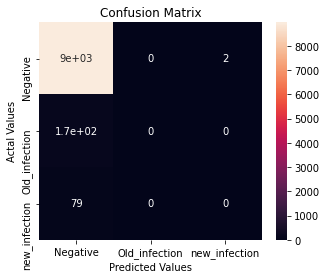

In [ ]:
# Creating  a confusion matrix,which compares the y_test and y_pred
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred)
# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
cm_df = pd.DataFrame(cm,
                     index = ['Negative','Old_infection','new_infection'], 
                     columns = ['Negative','Old_infection','new_infection'])
#Plotting the confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

>0.0000 0.975 (0.000)
>0.0001 0.975 (0.000)
>0.0010 0.975 (0.000)
>0.0100 0.975 (0.000)
>0.1000 0.975 (0.000)
>1.0000 0.975 (0.000)


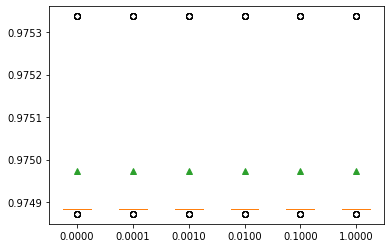

In [ ]:
# tune regularization for multinomial logistic regression
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot
# get a list of models to evaluate
def get_models():
	models = dict()
	for p in [0.0, 0.0001, 0.001, 0.01, 0.1, 1.0]:
		# create name for model
		key = '%.4f' % p
		# turn off penalty in some cases
		if p == 0.0:
			# no penalty in this case
			models[key] = LogisticRegression(multi_class='multinomial', solver='lbfgs', penalty='none')
		else:
			models[key] = LogisticRegression(multi_class='multinomial', solver='lbfgs', penalty='l2', C=p)
	return models
# evaluate a give model using cross-validation
def evaluate_model(model, x_train, y_train):
	# define the evaluation procedure
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	# evaluate the model
	scores = cross_val_score(model, x_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
	return scores
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	# evaluate the model and collect the scores
	scores = evaluate_model(model, x_train, y_train)
	# store the results
	results.append(scores)
	names.append(name)
	# summarize progress along the way
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_regression

cl = RandomForestClassifier(n_estimators=100,max_depth=5, max_features=5, min_samples_leaf=3,random_state=0)
cl.fit(x_train, y_train)
y_pred1 = cl.predict(x_train)
y_pred2 = cl.predict(x_test)



In [ ]:
from sklearn import metrics
pred=model.predict(x_train)
# Model Accuracy, how often is the classifier correct?
print("Accuracy train:",metrics.accuracy_score(y_train, pred))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred2))

Accuracy train: 0.974972087830294
Accuracy: 0.9734071420818409


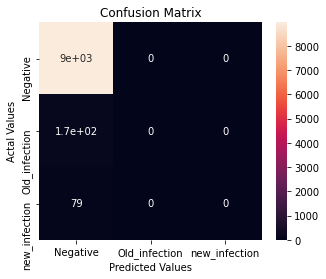

In [ ]:
# Creating  a confusion matrix,which compares the y_test and y_pred
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred2)
# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
cm_df = pd.DataFrame(cm,
                     index = ['Negative','Old_infection','new_infection'], 
                     columns = ['Negative','Old_infection','new_infection'])
#Plotting the confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

Dealing with class imballance

In [ ]:
from imblearn.over_sampling import SMOTE
# transform the dataset
oversample = SMOTE()
X, Y= oversample.fit_resample(x_train, y_train)


/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/loca

Class=0, n=20958 (33.333%)
Class=1, n=20958 (33.333%)
Class=2, n=20958 (33.333%)


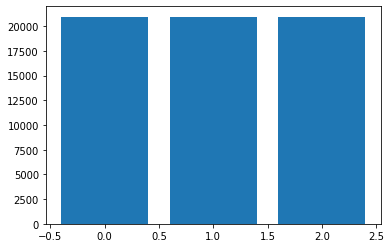

In [ ]:
# summarize distribution
from collections import Counter
from matplotlib import pyplot
from sklearn.preprocessing import LabelEncoder
counter = Counter(Y)
for k,v in counter.items():
	per = v / len(Y) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

In [ ]:
# Count samples per class
classes_zero = df[df['Response'] == 0]
classes_one = df[df['Response'] == 1]
classes_one = df[df['Response'] == 2]

# Print sizes
print(f'Class 0: {len(classes_zero)}')
print(f'Class 1: {len(classes_one)}')

Logistics

In [ ]:
# make a prediction with a multinomial logistic regression model
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
# define the multinomial logistic regression model
model = LogisticRegression(multi_class='multinomial', solver='lbfgs')
# fit the model on the whole dataset
weights={0:0.20,1:5.0,2:5.2}
model.fit(x_train, y_train, class_weight=weights)

TypeError: ignored

In [ ]:
# Create training and test split out of imbalanced data set created above
# X_train, X_test, y_train, y_test = train_test_split(X_imb, y_imb, test_size=0.3, random_state=1, stratify=y_imb)
#
# Create pipeline with LogisticRegression and class_weight as {0:3, 1:1}
#
pipeline = make_pipeline(StandardScaler(), LogisticRegression(random_state=1, class_weight={0:0.20,1:5.0,2:5.2}))
#
# Create a randomized search for finding most appropriate model
#
param_distributions = [{'logisticregression__C': sc.stats.expon(scale=100)}]
rs = RandomizedSearchCV(estimator=pipeline, param_distributions = param_distributions, cv = 10, scoring = 'accuracy', refit = True,
                        n_jobs = 1,random_state=1)
#
# Fit the model
#
rs.fit(x_train, y_train)
#
# Find the best score, params and accuracy on the test dataset
#
print('Best Score:', rs.best_score_, '\nBest Params:', rs.best_params_)
print('Test Accuracy: %0.3f' % rs.score(x_test, y_test))

NameError: ignored

In [ ]:
from sklearn import metrics
pred=model.predict(X)
pred_2=model.predict(x_test)
# Model Accuracy, how often is the classifier correct?
print("Accuracy train:",metrics.accuracy_score(Y, pred))
print("Accuracy:",metrics.accuracy_score(y_test, pred_2))

Accuracy train: 0.7530934885644305
Accuracy: 0.9640725062411809


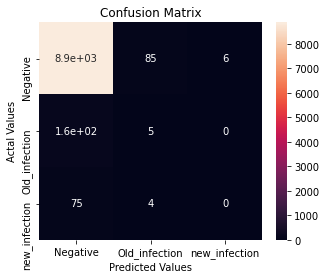

In [ ]:
# Creating  a confusion matrix,which compares the y_test and y_pred
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, pred_2)
# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
cm_df = pd.DataFrame(cm,
                     index = ['Negative','Old_infection','new_infection'], 
                     columns = ['Negative','Old_infection','new_infection'])
#Plotting the confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
print("Shape of the dataset without outlier: ",x.shape)

Shape of the dataset without outlier:  (30709, 17)


In [ ]:
# form crosstab with dropna=False between mcstatus and hivstatusfinal
pd.crosstab(data_without_missing_values.mcstatus,data_without_missing_values.hivstatusfinal, dropna=False)

hivstatusfinal,Negative,Positive
mcstatus,,
Female_NA,7415,290
NO,3825,138
YES,2704,47


In [ ]:
data_dd['firstsxagedk'].value_counts()

NEVER HAD VAGINAL SEX    7208
DON'T KNOW                103
OUT OF RANGE               62
REFUSED                    42
Name: firstsxagedk, dtype: int64

In [ ]:
data.isnull().sum()

gender                 0
age                    0
work12mo               0
mcstatus               0
firstsxage          3579
part12monum         6469
partlastcndm1      11959
partlastsup1       12164
partknowhiv1       11959
analsxever         11959
hivtesty            6933
hivtstrslt          6930
attitude1              0
attitude2              0
urban                  0
wealthquintile        20
hivstatusfinal         0
educationrwanda       15
hhrmarital             0
hiv_status             0
age_diff           12005
dtype: int64

In [ ]:
df.info()
# /content/lorraine.csv

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39328 entries, 0 to 39327
Columns: 526 entries, country to hepbcwt186
dtypes: datetime64[ns](4), float64(508), object(14)
memory usage: 158.1+ MB


In [ ]:
# # Save submission file
# df.to_csv('lorraine.csv')
# files.download('lorraine.csv')

# Residence

In [ ]:
# urban frequency
df['urban'].value_counts()

Rural    26393
Urban     8872
Name: urban, dtype: int64

# Gender

In [ ]:
# urban frequency
df['province'].value_counts()

west      8383
south     7074
north     6877
kigali    6714
east      6217
Name: province, dtype: int64

In [ ]:
# gender frequency
df['gender'].value_counts()

Female    18988
Male      16277
Name: gender, dtype: int64

# Education

In [ ]:
# school frequency
df['schlhi'].value_counts()

PRIMARY       18390
SECONDARY      7984
HIGHER         1464
REFUSED           3
DON'T KNOW        3
Name: schlhi, dtype: int64

to delete: schlhi, 

In [ ]:
# school frequency
df['educationrwanda'].value_counts()

Primary                18374
Secondary               7984
Missing                 4571
No education            2872
More than Secondary     1464
Name: educationrwanda, dtype: int64

In [ ]:
# replacing NaN in education column from column of other education column
df.educationrwanda[df.educationrwanda == 'Missing'] = df.schlhi

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
# school frequency
df['educationrwanda'].value_counts()

Primary                18374
Secondary               7984
No education            2872
More than Secondary     1464
REFUSED                    3
DON'T KNOW                 3
Name: educationrwanda, dtype: int64

In [ ]:
df['educationrwanda'].isnull().sum()

15

# HIV status

In [ ]:
# replacing NaN in hiv staus final column column from column of other hiv status
df.hivstatusfinal[df.hivstatusfinal == 'Missing'] = df.hivtstrslt

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
df.hivstatusfinal.isnull().sum()

4556

In [ ]:
df = df[df['hivstatusfinal'].notna()]

In [ ]:
df.hivstatusfinal.isnull().sum()

0

In [ ]:
# Hiv status frequency
df['hivstatusfinal'].value_counts()

HIV Negative    29703
HIV Positive      934
NEGATIVE           72
Name: hivstatusfinal, dtype: int64

In [ ]:
df["hivstatusfinal"]=df["hivstatusfinal"].map({"HIV Positive": "Positive", "HIV Negative": "Negative", "NEGATIVE":"Negative"})

In [ ]:
df.hivtesty.describe()

count    23776.000000
mean      2001.226321
std        171.045963
min         -9.000000
25%       2015.000000
50%       2017.000000
75%       2018.000000
max       2019.000000
Name: hivtesty, dtype: float64

adding new column of new hiv infection

In [ ]:
# creating new variable of negative, old and new HIV infection
filters = [
   (df.hivstatusfinal == 'Negative'),
   (df.hivstatusfinal == 'Positive') & (df.hivtesty >2017.0),
   (df.hivstatusfinal == 'Positive') & (df.hivtesty <2017.0)
]
values = ["Negative", "new_infection", "Old_infection"]
df["hiv_status"] = np.select(filters, values)
df.head()

,country,householdid,personid,centroidid,province,gender,age,schlhi,work12mo,curmar,mcstatus,firstsxage,firstsxagedk,part12monum,part12modkr,partrelation1,partgend1,partage1,partlastcndm1,partlastsup1,partknowhiv1,partrelation2,partgend2,partage2,partagedk2,partlastcndm2,partlastsup2,partagain2,partknowhiv2,parthivtest2,parthivsat2,partrelation3,partgend3,partage3,partagedk3,partlastcndm3,partlastsup3,partknowhiv3,parthivtest3,parthivsat3,analsxever,hivtesty,hivtstrslt,hivtfposy,attitude1,attitude2,urban,wealthquintile,hivstatusfinal,educationrwanda,hhrmarital,lastpartner,hiv_status
0,Rwanda,RW000000000001,RW00000000000101,RW000069,kigali,Female,42,SECONDARY,YES,MARRIED,NaN,28.0,NaN,1.0,NaN,HUSBAND/WIFE,MALE,44.0,NO,NO,YES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,2018.0,NEGATIVE,NaN,DISAGREE,DISAGREE,Urban,Highest,Negative,Secondary,MARRIED/COHABITING/LIVINGTOGETHER,partner 1,Negative
1,Rwanda,RW000000000001,RW00000000000102,RW000069,kigali,Male,44,HIGHER,YES,MARRIED,YES,17.0,NaN,1.0,NaN,HUSBAND/WIFE,FEMALE,42.0,NO,NO,YES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,2016.0,NEGATIVE,NaN,DISAGREE,DISAGREE,Urban,Highest,Negative,More than Secondary,MARRIED/COHABITING/LIVINGTOGETHER,partner 1,Negative
2,Rwanda,RW000000000001,RW00000000000107,RW000069,kigali,Female,30,SECONDARY,YES,SEPARATED,NaN,20.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.0,NEGATIVE,NaN,DISAGREE,STRONGLY AGREE,Urban,Highest,Negative,Secondary,SEPARATED,NaN,Negative
3,Rwanda,RW000000000001,RW00000000000108,RW000069,kigali,Female,24,SECONDARY,YES,NaN,NaN,24.0,NaN,1.0,NaN,STRANGER,MALE,27.0,NO,NO,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,2018.0,NEGATIVE,NaN,STRONGLY DISAGREE,DISAGREE,Urban,Highest,Negative,Secondary,NEVER-MARRIED,partner 1,Negative
4,Rwanda,RW000000000002,RW00000000000201,RW000259,kigali,Male,42,PRIMARY,YES,NaN,YES,22.0,NaN,1.0,NaN,STRANGER,FEMALE,35.0,NO,NO,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,2018.0,NEGATIVE,NaN,STRONGLY DISAGREE,STRONGLY DISAGREE,Urban,Highest,Negative,Primary,NEVER-MARRIED,partner 1,Negative


In [ ]:
# Hiv status frequency
df['hiv_status'].value_counts()

Negative         29775
Old_infection      518
new_infection      265
0                  151
Name: hiv_status, dtype: int64

In [ ]:
# Hiv status frequency
df['hivstatusfinal'].value_counts()

Negative    29775
Positive      934
Name: hivstatusfinal, dtype: int64

In [ ]:
# Hiv status frequency
df['hivtstrslt'].value_counts()

NEGATIVE                      22463
POSITIVE                        690
DID NOT RECEIVE THE RESULT      543
DON'T KNOW                       42
UNCERTAIN/INDETERMINATE          36
REFUSED                           5
Name: hivtstrslt, dtype: int64

In [ ]:
# form crosstab with dropna=False between work12mo and hivstatusfinal
pd.crosstab(df.work12mo,df.hivstatusfinal, dropna=False)

hivstatusfinal,Negative,Positive
work12mo,,
DON'T KNOW,1,0
NO,17832,523
REFUSED,3,0
YES,11939,411


# Work

In [ ]:
# employe last 12 months frequency
df['work12mo'].value_counts()

NO            18355
YES           12350
REFUSED           3
DON'T KNOW        1
Name: work12mo, dtype: int64

to remove: hhrmarital, mcage, partlivew1, partagain1, parthivtest1, parthivsat1, sex12months, sexever, condomlastsex12months, lastpartnerrelation12months

> Indented block



# Marital statust

In [ ]:
# mariatl status frequency
df['curmar'].value_counts()

MARRIED            10206
LIVING TOGETHER     4573
SEPARATED           1519
WIDOWED             1236
DIVORCED             164
REFUSED                7
DON'T KNOW             4
Name: curmar, dtype: int64

In [ ]:
# mariatl status frequency
df['hhrmarital'].value_counts()

MARRIED/COHABITING/LIVINGTOGETHER    14779
NEVER-MARRIED                        12995
SEPARATED                             1519
WIDOWED                               1236
DIVORCED                               164
Missing                                 16
Name: hhrmarital, dtype: int64

In [ ]:
df['curmar'].isnull().sum()

13000

In [ ]:
# form crosstab with dropna=False between curmar and hivstatusfinal
pd.crosstab(df.curmar,df.hivstatusfinal, dropna=False)

hivstatusfinal,Negative,Positive
curmar,,
DIVORCED,157,7
DON'T KNOW,4,0
LIVING TOGETHER,4354,219
MARRIED,9969,237
REFUSED,6,1
SEPARATED,1381,138
WIDOWED,1084,152


# Male circumcision


In [ ]:
# circumcision status frequency
df['mcstatus'].value_counts()

NO            7581
YES           6227
REFUSED          5
DON'T KNOW       4
Name: mcstatus, dtype: int64

In [ ]:
df.mcstatus.isnull().sum()

16892

In [ ]:
# form crosstab with dropna=False between mcstatus and hivstatusfinal
pd.crosstab(df.mcstatus,df.hivstatusfinal, dropna=False)

hivstatusfinal,Negative,Positive
mcstatus,,
DON'T KNOW,4,0
NO,7363,218
REFUSED,5,0
YES,6143,84


In [ ]:
# form crosstab with dropna=False between mcstatus and hivstatusfinal
pd.crosstab(df.mcstatus,df.gender, dropna=False)

gender,Female,Male
mcstatus,,
DON'T KNOW,0,4
NO,0,7581
REFUSED,0,5
YES,0,6227


In [ ]:
# replacing NaN in education column from column of other education column
# df.mcstatus[df.mcstatus == 'NaN'] = df.gender
# Apply the function
df['mcstatus'] = df['mcstatus'].replace(np.nan, 0)

In [ ]:
df.mcstatus.isnull().sum()

0

In [ ]:
# replacing NaN in education column from column of other education column
df.mcstatus[df.mcstatus == 0] = df.gender

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
# form crosstab with dropna=False between mcstatus and gender
pd.crosstab(df.mcstatus,df.gender, dropna=False)

gender,Female,Male
mcstatus,,
DON'T KNOW,0,4
Female,16892,0
NO,0,7581
REFUSED,0,5
YES,0,6227


In [ ]:
df["mcstatus"]=df["mcstatus"].map({"NO": "NO", "YES": "YES", "Female":"Female_NA","DON'T KNOW":"NO","REFUSED":"NO"})

In [ ]:
# form crosstab with dropna=False between mcstatus and gender
pd.crosstab(df.mcstatus,df.gender, dropna=False)

gender,Female,Male
mcstatus,,
Female_NA,16892,0
NO,0,7590
YES,0,6227


Age at first sex

In [ ]:
df.age.describe()

count    30709.000000
mean        31.630955
std         12.960183
min         15.000000
25%         21.000000
50%         29.000000
75%         40.000000
max         64.000000
Name: age, dtype: float64

In [ ]:
df['partage1'] = df['partage1'].replace(np.nan, 0)
df.partage1[df.partage1 == 0] = df.partage2
df.partage1[df.partage1 == 0] = df.partage3

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
# age difference
df['age_diff']=df['age']-df['partage1']
df['age_diff']=df['age_diff'].abs()
df.head()

,country,householdid,personid,centroidid,province,gender,age,schlhi,work12mo,curmar,mcstatus,firstsxage,firstsxagedk,part12monum,part12modkr,partrelation1,partgend1,partage1,partlastcndm1,partlastsup1,partknowhiv1,partrelation2,partgend2,partage2,partagedk2,partlastcndm2,partlastsup2,partagain2,partknowhiv2,parthivtest2,parthivsat2,partrelation3,partgend3,partage3,partagedk3,partlastcndm3,partlastsup3,partknowhiv3,parthivtest3,parthivsat3,analsxever,hivtesty,hivtstrslt,hivtfposy,attitude1,attitude2,urban,wealthquintile,hivstatusfinal,educationrwanda,hhrmarital,lastpartner,hiv_status,AgeGroup_fsx,analsex,age_diff
0,Rwanda,RW000000000001,RW00000000000101,RW000069,kigali,Female,42,SECONDARY,YES,MARRIED,Female_NA,28.0,NaN,1.0,NaN,partner,MALE,44.0,NO,partner,YES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,2018.0,NEGATIVE,NaN,DISAGREE,DISAGREE,Urban,Highest,Negative,Secondary,MARRIED/COHABITING/LIVINGTOGETHER,partner 1,Negative,Youth,True,2.0
1,Rwanda,RW000000000001,RW00000000000102,RW000069,kigali,Male,44,HIGHER,YES,MARRIED,YES,17.0,NaN,1.0,NaN,partner,FEMALE,42.0,NO,partner,YES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,2016.0,NEGATIVE,NaN,DISAGREE,DISAGREE,Urban,Highest,Negative,More than Secondary,MARRIED/COHABITING/LIVINGTOGETHER,partner 1,Negative,Teens,True,2.0
2,Rwanda,RW000000000001,RW00000000000107,RW000069,kigali,Female,30,SECONDARY,YES,SEPARATED,Female_NA,20.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.0,NEGATIVE,NaN,DISAGREE,STRONGLY AGREE,Urban,Highest,Negative,Secondary,SEPARATED,NaN,Negative,Youth,True,NaN
3,Rwanda,RW000000000001,RW00000000000108,RW000069,kigali,Female,24,SECONDARY,YES,NaN,Female_NA,24.0,NaN,1.0,NaN,sex worker,MALE,27.0,NO,sex worker,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,2018.0,NEGATIVE,NaN,STRONGLY DISAGREE,DISAGREE,Urban,Highest,Negative,Secondary,NEVER-MARRIED,partner 1,Negative,Youth,True,3.0
4,Rwanda,RW000000000002,RW00000000000201,RW000259,kigali,Male,42,PRIMARY,YES,NaN,YES,22.0,NaN,1.0,NaN,sex worker,FEMALE,35.0,NO,sex worker,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,2018.0,NEGATIVE,NaN,STRONGLY DISAGREE,STRONGLY DISAGREE,Urban,Highest,Negative,Primary,NEVER-MARRIED,partner 1,Negative,Youth,True,7.0


In [ ]:
df.age_diff.isnull().sum()

12005

In [ ]:
df.age_diff.describe()

count    18704.000000
mean         5.025877
std          5.083232
min          0.000000
25%          2.000000
50%          4.000000
75%          7.000000
max         53.000000
Name: age_diff, dtype: float64

In [ ]:
df.firstsxage.describe()

count    23294.000000
mean        20.202842
std          4.101169
min         14.000000
25%         18.000000
50%         20.000000
75%         22.000000
max         35.000000
Name: firstsxage, dtype: float64

In [ ]:
df.firstsxage.isnull().sum()

7415

In [ ]:
# firstsxagedk
bins= [0,20,30,36]
labels = ['Teens','Youth','Mature']
df['AgeGroup_fsx'] = pd.cut(df['firstsxage'], bins=bins, labels=labels, right=False)

In [ ]:

# reason of not reporting age at first sex frequency
df['firstsxagedk'].value_counts()

NEVER HAD VAGINAL SEX    7208
DON'T KNOW                103
OUT OF RANGE               62
REFUSED                    42
Name: firstsxagedk, dtype: int64

In [ ]:
# reason of not reporting age at first sex frequency
df['AgeGroup_fsx'].value_counts()

Youth     11360
Teens     11189
Mature      745
Name: AgeGroup_fsx, dtype: int64

In [ ]:
df.AgeGroup_fsx.isnull().sum()

7415

In [ ]:
df.tail()

,country,householdid,personid,centroidid,province,gender,age,schlhi,work12mo,curmar,mcstatus,firstsxage,firstsxagedk,part12monum,part12modkr,partrelation1,partgend1,partage1,partlastcndm1,partlastsup1,partknowhiv1,partrelation2,partgend2,partage2,partagedk2,partlastcndm2,partlastsup2,partagain2,partknowhiv2,parthivtest2,parthivsat2,partrelation3,partgend3,partage3,partagedk3,partlastcndm3,partlastsup3,partknowhiv3,parthivtest3,parthivsat3,analsxever,hivtesty,hivtstrslt,hivtfposy,attitude1,attitude2,urban,wealthquintile,hivstatusfinal,educationrwanda,hhrmarital,lastpartner,hiv_status,AgeGroup_fsx
35256,Rwanda,RW000000011838,RW00000001183802,RW000241,kigali,Female,20,PRIMARY,NO,LIVING TOGETHER,Female_NA,NaN,DON'T KNOW,1.0,NaN,partner,MALE,24.0,NO,partner,YES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,2018.0,NEGATIVE,NaN,DISAGREE,AGREE,Urban,Highest,Negative,Primary,MARRIED/COHABITING/LIVINGTOGETHER,partner 1,Negative,NaN
35257,Rwanda,RW000000011839,RW00000001183901,RW000278,south,Male,36,NaN,YES,LIVING TOGETHER,NO,30.0,NaN,1.0,NaN,partner,MALE,26.0,NO,partner,DON'T KNOW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,2007.0,NEGATIVE,NaN,DISAGREE,AGREE,Rural,Second,Negative,No education,MARRIED/COHABITING/LIVINGTOGETHER,partner 1,Negative,Mature
35258,Rwanda,RW000000011839,RW00000001183902,RW000278,south,Female,26,SECONDARY,NO,LIVING TOGETHER,Female_NA,21.0,NaN,1.0,NaN,partner,MALE,36.0,NO,partner,YES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,2016.0,NEGATIVE,NaN,STRONGLY DISAGREE,STRONGLY AGREE,Rural,Second,Negative,Secondary,MARRIED/COHABITING/LIVINGTOGETHER,partner 1,Negative,Youth
35259,Rwanda,RW000000011841,RW00000001184101,RW000365,kigali,Female,48,PRIMARY,NO,NaN,Female_NA,NaN,NEVER HAD VAGINAL SEX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.0,NEGATIVE,NaN,STRONGLY DISAGREE,DISAGREE,Urban,Highest,Negative,Primary,NEVER-MARRIED,NaN,Negative,NaN
35261,Rwanda,RW000000011841,RW00000001184103,RW000365,kigali,Female,43,PRIMARY,NO,WIDOWED,Female_NA,22.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2009.0,NEGATIVE,NaN,DISAGREE,DISAGREE,Urban,Highest,Negative,Primary,WIDOWED,NaN,Negative,Youth


In [ ]:
# form crosstab with dropna=False between curmar and df.curmar
pd.crosstab(df.mcstatus,df.curmar, dropna=False)

curmar,DIVORCED,DON'T KNOW,LIVING TOGETHER,MARRIED,REFUSED,SEPARATED,WIDOWED
mcstatus,,,,,,,
Female_NA,115,3,2541,5485,5,1215,1162
NO,29,0,1266,3293,1,203,63
YES,20,1,766,1428,1,101,11


In [ ]:
# form crosstab with dropna=False between firstsxagedk and hivstatusfinal
pd.crosstab(df.firstsxagedk,df.hivstatusfinal, dropna=False)

hivstatusfinal,Negative,Positive
firstsxagedk,,
DON'T KNOW,97,6
NEVER HAD VAGINAL SEX,7178,30
OUT OF RANGE,61,1
REFUSED,40,2


# number of partner and relation

In [ ]:
df.part12monum.describe()

count    24240.000000
mean         0.921535
std          0.785317
min         -7.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          6.000000
Name: part12monum, dtype: float64

In [ ]:
df.part12monum.isnull().sum()

6469

In [ ]:
# reason of not reporting number of partner frequency
df['part12monum'].value_counts()

 1.0    16301
 0.0     5465
 2.0     1641
 3.0      538
 4.0      113
 6.0       79
 5.0       78
-7.0       25
Name: part12monum, dtype: int64

In [ ]:
# reason of not reporting number of partner frequency
df['part12modkr'].value_counts()

REFUSED       20
DON'T KNOW    18
Name: part12modkr, dtype: int64

In [ ]:
# if she lives with partner frequency
df['partrelation1'].value_counts()

HUSBAND/WIFE                          11088
FRIEND/ACQUAINTANCE                    3212
LIVE-IN PARTNER                        2995
PARTNER NOT LIVING WITH RESPONDENT      587
EX-SPOUSE/EX-PARTNER                    346
STRANGER                                291
SEX WORKER                              122
SEX WORKER CLIENT                        26
REFUSED                                   7
DON'T KNOW                                4
Name: partrelation1, dtype: int64

In [ ]:
df["partrelation1"]=df["partrelation1"].map({"HUSBAND/WIFE": "partner", "LIVE-IN PARTNER":"partner","FRIEND/ACQUAINTANCE":"Friend", "PARTNER NOT LIVING WITH RESPONDENT":"Friend",
                                   "EX-SPOUSE/EX-PARTNER":"Friend","STRANGER":"sex worker","SEX WORKER":"sex worker","SEX WORKER CLIENT":"sex worker",
                                   "REFUSED":"sex worker","DON'T KNOW":"sex worker"})

In [ ]:
# if she lives with partner frequency
df['partrelation1'].value_counts()

partner       14083
Friend         4145
sex worker      450
Name: partrelation1, dtype: int64

In [ ]:
df.partrelation1.isnull().sum()

12031

In [ ]:
# form crosstab with dropna=False between firstsxagedk and hivstatusfinal
pd.crosstab(df.partrelation1,df.hivstatusfinal, dropna=False)

hivstatusfinal,Negative,Positive
partrelation1,,
Friend,3962,183
partner,13655,428
sex worker,425,25


In [ ]:
# if she lives with partner frequency
df['partlastsup1'].value_counts()

NO            17868
YES             721
DON'T KNOW        9
REFUSED           4
Name: partlastsup1, dtype: int64

In [ ]:
# form crosstab with dropna=False between paying sex and hivstatusfinal
pd.crosstab(df.partlastsup1,df.hivstatusfinal, dropna=False)

hivstatusfinal,Negative,Positive
partlastsup1,,
DON'T KNOW,9,0
NO,17300,568
REFUSED,4,0
YES,664,57


In [ ]:
 df.partlastsup1[df.partlastsup1 == "NO"] = df.partrelation1
 df.partlastsup1[df.partlastsup1 == "NO"] = df.partlastsup2
 df.partlastsup1[df.partlastsup1 == "NO"] = df.partlastsup3

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid 

In [ ]:
df.partlastsup1.isnull().sum()

12170

In [ ]:
# if she lives with partner frequency
df['partlastsup1'].value_counts()

partner       13970
friend         3575
sex worker     1000
Name: partlastsup1, dtype: int64

In [ ]:
df["partlastsup1"]=df["partlastsup1"].map({"partner": "partner","Friend":"friend","YES":"sex worker","sex worker":"sex worker",
                                   "REFUSED":"sex worker","DON'T KNOW":"sex worker"})

In [ ]:
# if she lives with partner frequency
df['partlastsup1'].value_counts()

partner       13970
friend         3575
sex worker      994
Name: partlastsup1, dtype: int64

In [ ]:
# form crosstab with dropna=False between paying sex and hivstatusfinal
pd.crosstab(df.partlastsup1,df.hivstatusfinal, dropna=False)

hivstatusfinal,Negative,Positive
partlastsup1,,
friend,3436,139
partner,13550,420
sex worker,928,66


In [ ]:
# the rate of HIV positive depending on partner relations
print('friend :',(139/3436)*100)
print('partner :', (420/13550)*100)
print('sex worker :', (66/928)*100)

friend : 4.045401629802096
partner : 3.0996309963099633
sex worker : 7.112068965517242


In [ ]:
#  df.partlastsup1[df.partlastsup1].replace(np.nan, 0)
df['partlastsup1'].fillna(0, inplace=True)
df.partlastsup1[df.partlastsup1 == 0] = df.partlastsup2
df.partlastsup1[df.partlastsup1 == 0] = df.partlastsup3

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
#  partlastsup2 frequency
df['partlastsup1'].value_counts()

partner       13970
friend         3575
sex worker      994
NO               62
YES               6
Name: partlastsup1, dtype: int64

In [ ]:
df["partlastsup1"]=df["partlastsup1"].map({"partner": "partner","friend":"friend","YES":"sex worker","sex worker":"sex worker",
                                   "REFUSED":"sex worker","DON'T KNOW":"sex worker"})

In [ ]:
#  partlastsup2 frequency
df['partlastsup1'].value_counts()

partner       13970
friend         3575
sex worker     1000
Name: partlastsup1, dtype: int64

In [ ]:
#  partlastsup2 frequency
df['hivstatusfinal'].value_counts()

Negative    29775
Positive      934
Name: hivstatusfinal, dtype: int64

In [ ]:
# form crosstab with dropna=False between paying sex and hivstatusfinal
pd.crosstab(df.partlastsup1,df.hivstatusfinal, dropna=False)

hivstatusfinal,Negative,Positive
partlastsup1,,
friend,3436,139
partner,13550,420
sex worker,934,66


In [ ]:
139+420+66

625

In [ ]:
#  partlastsup2 frequency
df['partlastsup2'].value_counts()

NO            2061
YES            258
REFUSED          3
DON'T KNOW       1
Name: partlastsup2, dtype: int64

In [ ]:
#  partlastsup3 frequency
df['partlastsup3'].value_counts()

NO            629
YES            90
REFUSED         3
DON'T KNOW      1
Name: partlastsup3, dtype: int64

In [ ]:

#  last partner condom used frequency
df['partlastcndm1'].value_counts()

NO            15829
YES            2911
REFUSED           5
DON'T KNOW        5
Name: partlastcndm1, dtype: int64

In [ ]:
df.partlastcndm1.isnull().sum()

11959

In [ ]:
# form crosstab with dropna=False between curmar and df.curmar
pd.crosstab(df.partlastcndm1,df.hivstatusfinal, dropna=False)

hivstatusfinal,Negative,Positive
partlastcndm1,,
DON'T KNOW,4,1
NO,15430,399
REFUSED,5,0
YES,2675,236


In [ ]:
# paid sex frequency
df['partlastsup1'].value_counts()

partner       13970
friend         3575
sex worker     1000
Name: partlastsup1, dtype: int64

In [ ]:
# form crosstab with dropna=False between curmar and df.curmar
pd.crosstab(df.partlastsup1,df.hivstatusfinal, dropna=False)

hivstatusfinal,Negative,Positive
partlastsup1,,
friend,3436,139
partner,13550,420
sex worker,934,66


In [ ]:
# know HIV status of partner frequency
df['partknowhiv1'].value_counts()


YES           13865
NO             4622
DON'T KNOW      259
REFUSED           4
Name: partknowhiv1, dtype: int64

In [ ]:
# df["partknowhiv1"]=df["partknowhiv1"].map({"YES": "YES","NO":"NO","DON'T KNOW":"DON'T KNOW","sex worker":"sex worker",
#                                    "REFUSED":"sex worker","DON'T KNOW":"sex worker"})

In [ ]:
df.partknowhiv1.isnull().sum()

16515

In [ ]:
#  df.partlastsup1[df.partlastsup1].replace(np.nan, 0)
df['partknowhiv1'].fillna(0, inplace=True)
df.partknowhiv1[df.partknowhiv1 == 0] = df.partknowhiv2
df.partknowhiv1[df.partknowhiv1 == 0] = df.partknowhiv3


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
df.partknowhiv1.isnull().sum()

16515

In [ ]:
# anal sex frequency
df['analsxever'].value_counts()


NO            18639
YES              78
DON'T KNOW       21
REFUSED          12
Name: analsxever, dtype: int64

In [ ]:
df['analsex'] = np.where(df['gender']!= df['partgend1'], True, False)
df.head()

,country,householdid,personid,centroidid,province,gender,age,schlhi,work12mo,curmar,mcstatus,firstsxage,firstsxagedk,part12monum,part12modkr,partrelation1,partgend1,partage1,partlastcndm1,partlastsup1,partknowhiv1,partrelation2,partgend2,partage2,partagedk2,partlastcndm2,partlastsup2,partagain2,partknowhiv2,parthivtest2,parthivsat2,partrelation3,partgend3,partage3,partagedk3,partlastcndm3,partlastsup3,partknowhiv3,parthivtest3,parthivsat3,analsxever,hivtesty,hivtstrslt,hivtfposy,attitude1,attitude2,urban,wealthquintile,hivstatusfinal,educationrwanda,hhrmarital,lastpartner,hiv_status,AgeGroup_fsx,analsex
0,Rwanda,RW000000000001,RW00000000000101,RW000069,kigali,Female,42,SECONDARY,YES,MARRIED,Female_NA,28.0,NaN,1.0,NaN,partner,MALE,44.0,NO,partner,YES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,2018.0,NEGATIVE,NaN,DISAGREE,DISAGREE,Urban,Highest,Negative,Secondary,MARRIED/COHABITING/LIVINGTOGETHER,partner 1,Negative,Youth,True
1,Rwanda,RW000000000001,RW00000000000102,RW000069,kigali,Male,44,HIGHER,YES,MARRIED,YES,17.0,NaN,1.0,NaN,partner,FEMALE,42.0,NO,partner,YES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,2016.0,NEGATIVE,NaN,DISAGREE,DISAGREE,Urban,Highest,Negative,More than Secondary,MARRIED/COHABITING/LIVINGTOGETHER,partner 1,Negative,Teens,True
2,Rwanda,RW000000000001,RW00000000000107,RW000069,kigali,Female,30,SECONDARY,YES,SEPARATED,Female_NA,20.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.0,NEGATIVE,NaN,DISAGREE,STRONGLY AGREE,Urban,Highest,Negative,Secondary,SEPARATED,NaN,Negative,Youth,True
3,Rwanda,RW000000000001,RW00000000000108,RW000069,kigali,Female,24,SECONDARY,YES,NaN,Female_NA,24.0,NaN,1.0,NaN,sex worker,MALE,27.0,NO,sex worker,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,2018.0,NEGATIVE,NaN,STRONGLY DISAGREE,DISAGREE,Urban,Highest,Negative,Secondary,NEVER-MARRIED,partner 1,Negative,Youth,True
4,Rwanda,RW000000000002,RW00000000000201,RW000259,kigali,Male,42,PRIMARY,YES,NaN,YES,22.0,NaN,1.0,NaN,sex worker,FEMALE,35.0,NO,sex worker,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,2018.0,NEGATIVE,NaN,STRONGLY DISAGREE,STRONGLY DISAGREE,Urban,Highest,Negative,Primary,NEVER-MARRIED,partner 1,Negative,Youth,True


In [ ]:
# Wealth quantile frequency
df['analsex'].value_counts()

True    30709
Name: analsex, dtype: int64

In [ ]:

# Wealth quantile frequency
df['wealthquintile'].value_counts()

Highest    9173
Fourth     6941
Middle     6628
Second     6405
Lowest     6097
Name: wealthquintile, dtype: int64